In [1]:
%matplotlib inline
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
denlp = spacy.load('de')
ennlp = spacy.load('en')

In [3]:
LIMIT_SENTENCES = 1_000_000

# German (Wikipedia)

In [4]:
with open('data/leipzig/deu_wikipedia_2014_3M.txt') as f:
    delines = [l.strip() for l in f.readlines()]
    random.shuffle(delines)

In [5]:
%%time
dedocs = denlp.pipe(delines[:LIMIT_SENTENCES], n_threads=8, batch_size=10000)
dedocs = list(dedocs)

CPU times: user 17min 10s, sys: 50.8 s, total: 18min 1s
Wall time: 18min 16s


In [6]:
detokens = [t for d in dedocs for t in d]
detokens = pd.DataFrame.from_records(((t, t.pos_, t.tag_, 'DE') for t in detokens), columns=['Token', 'Coarse', 'Fine', 'Lang'])

# English (Wikipedia)

In [7]:
with open('data/english/wikipedia_2013.txt') as f:
    enlines = [l.strip() for l in f.readlines()]
    random.shuffle(enlines)

In [8]:
%%time
endocs = ennlp.pipe(enlines[:LIMIT_SENTENCES], n_threads=8, batch_size=10000)
endocs = list(endocs)

CPU times: user 20min 51s, sys: 1min 15s, total: 22min 7s
Wall time: 23min 14s


In [9]:
entokens = [t for d in endocs for t in d]
entokens = pd.DataFrame.from_records(((t, t.pos_, t.tag_, 'EN') for t in entokens), columns=['Token', 'Coarse', 'Fine', 'Lang'])

# Comparison

In [10]:
len(detokens), len(entokens)

(19849722, 22629070)

In [11]:
df = detokens.sample(1_000_000).append(entokens.sample(1_000_000))
len(detokens), len(entokens)

(19849722, 22629070)

In [12]:
df['Coarse'] = df['Coarse'].replace({
    'ADJ': 'adjective',
    'ADP': 'adposition',
    'ADV': 'adverb',
    'AUX': 'auxiliary verb',
    'CONJ': 'coordinating conjunction',
    'DET': 'determiner',
    'INTJ': 'interjection',
    'NOUN': 'noun',
    'NUM': 'numeral',
    'PART': 'particle',
    'PRON': 'pronoun',
    'PROPN': 'proper noun',
    'PUNCT': 'punctuation',
    'SCONJ': 'subordinating conjunction',
    'SYM': 'symbol',
    'VERB': 'verb',
    'X': 'other'
})


## Coarse Part-of-speech

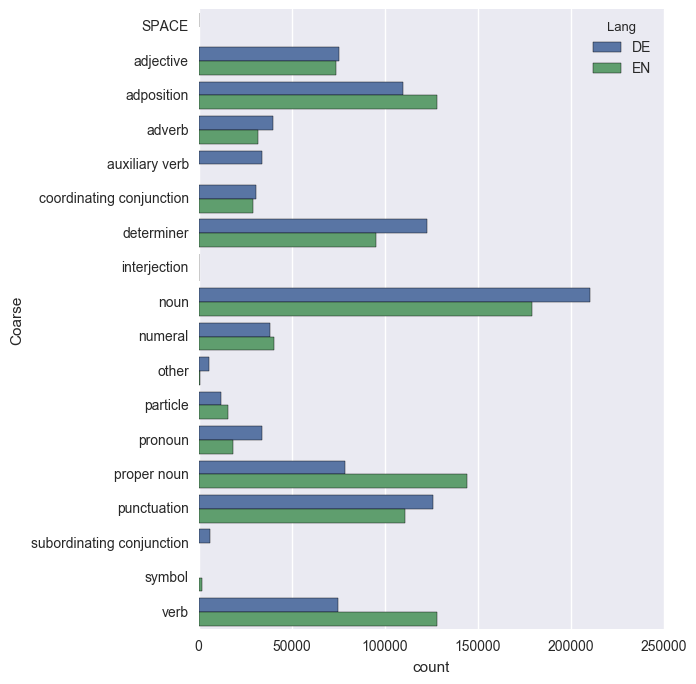

In [13]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.countplot(y="Coarse", hue="Lang", data=df.sort_values('Coarse'))

## Fine Part-of-speech

### German
[Tiger Annotation](http://www.ims.uni-stuttgart.de/forschung/ressourcen/lexika/TagSets/stts-table.html)

In [14]:
df['Fine'] = df['Fine'].replace({
    'ADJA':'attributives Adjektiv',
    'ADJD':'adverbiales oder prädikatives Adjektiv',
    'ADV':'Adverb',
    'APPR':'Präposition; Zirkumposition links',
    'APPRART':'Präposition mit Artikel',
    'APPO':'Postposition',
    'APZR':'Zirkumposition rechts',
    'ART':'bestimmter oder unbestimmter Artikel',
    'CARD':'Kardinalzahl',
    'FM':'Fremdsprachliches Material',
    'ITJ':'Interjektion',
    'KOUI':'unterordnende Konjunktion mit ``zu'' und Infinitiv',
    'KOUS':'unterordnende Konjunktion mit Satz',
    'KON':'nebenordnende Konjunktion',
    'KOKOM':'Vergleichskonjunktion',
    'NN':'normales Nomen',
    'NE':'Eigennamen',
    'PDS':'substituierendes Demonstrativpronomen',
    'PDAT':'attribuierendes Demonstrativpronomen',
    'PIS':'substituierendes Indefinitpronomen',
    'PIAT':'attribuierendes Indefinitpronomen ohne Determiner',
    'PIDAT':'attribuierendes Indefinitpronomen mit Determiner',
    'PPER':'irreflexives Personalpronomen',
    'PPOSS':'substituierendes Possessivpronomen',
    'PPOSAT':'attribuierendes Possessivpronomen',
    'PRELS':'substituierendes Relativpronomen',
    'PRELAT':'attribuierendes Relativpronomen',
    'PRF':'reflexives Personalpronomen',
    'PROAV': 'Pronominaladverb',
    'PWS':'substituierendes Interrogativpronomen',
    'PWAT':'attribuierendes Interrogativpronomen',
    'PWAV':'adverbiales Interrogativ- oder Relativpronomen',
    'PAV':'Pronominaladverb',
    'PTKZU':'``zu'' vor Infinitiv',
    'PTKNEG':'Negationspartikel',
    'PTKVZ':'abgetrennter Verbzusatz',
    'PTKANT':'Antwortpartikel',
    'PTKA':'Partikel bei Adjektiv oder Adverb',
    'TRUNC':'Kompositions-Erstglied',
    'VVFIN':'finites Verb, voll',
    'VVIMP':'Imperativ, voll',
    'VVINF':'Infinitiv, voll',
    'VVIZU':'Infinitiv mit ``zu'', voll',
    'VVPP':'Partizip Perfekt, voll',
    'VAFIN':'finites Verb, aux',
    'VAIMP':'Imperativ, aux',
    'VAINF':'Infinitiv, aux',
    'VAPP':'Partizip Perfekt, aux',
    'VMFIN':'finites Verb, modal',
    'VMINF':'Infinitiv, modal',
    'VMPP':'Partizip Perfekt, modal',
    'XY':'Nichtwort, Sonderzeichen enthaltend',
    '$,':'Komma',
    '$.':'Satzbeendende Interpunktion',
    '$(':'sonstige Satzzeichen satzintern'
})

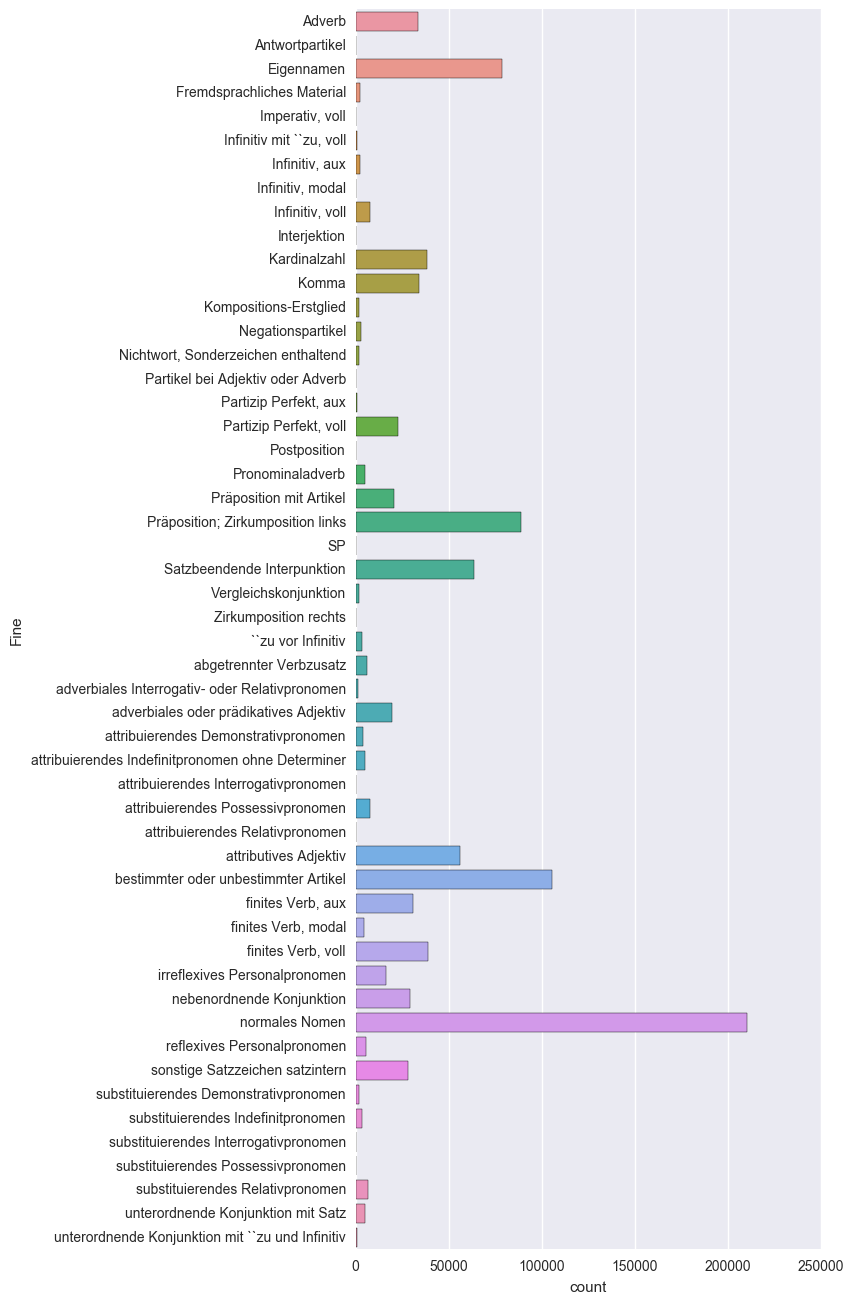

In [15]:
fig, ax = plt.subplots(figsize=(6, 16))
sns.countplot(y="Fine", data=df[df.Lang == 'DE'].sort_values('Fine'))

### English
[Penn Annotation](https://cs.nyu.edu/grishman/jet/guide/PennPOS.html)


In [16]:
df['Fine'] = df['Fine'].replace({
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb',
})

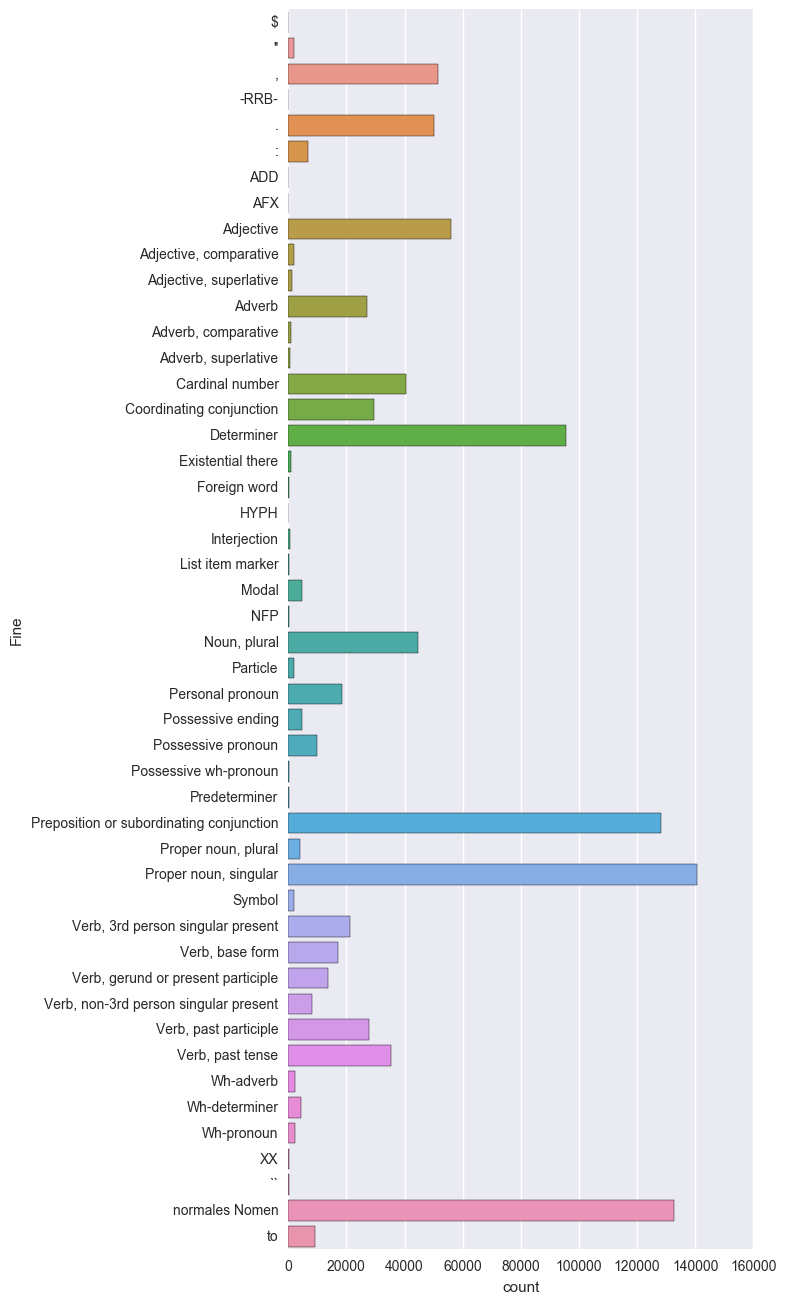

In [17]:
fig, ax = plt.subplots(figsize=(6, 16))
sns.countplot(y="Fine", data=df[df.Lang == 'EN'].sort_values('Fine'))